In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
product = pd.read_csv("products.csv")
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProductID        108 non-null    int64 
 1   ProductName      108 non-null    object
 2   ProductType      108 non-null    object
 3   ProductCategory  108 non-null    object
 4   Price            108 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.3+ KB


In [9]:
product.sample(5)

,ProductID,ProductName,ProductType,ProductCategory,Price
7,1008,Neon Shorts,Shorts,Clothing,$34.99
36,1037,Pink Ball Cap,Ball Cap,Headwear,$19.99
27,1028,Yellow Long Sleeve,Long Sleeve,Clothing,$33.99
90,1091,Credenza,Shelving and Storage,Furniture,"$3,000.99"
34,1035,Green Ball Cap,Ball Cap,Headwear,$19.99


In [7]:
stores = pd.read_csv("stores.csv")
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     102 non-null    int64 
 1   StoreCity   102 non-null    object
 2   StoreState  102 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [10]:
stores.sample(5)

,StoreID,StoreCity,StoreState
71,172,Conroe,TX
20,121,Austin,TX
14,115,Arvada,CO
85,186,Detroit,MI
5,106,Allen,TX


In [92]:
transactions = pd.read_csv("transactions.csv")
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127204 entries, 0 to 127203
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CustomerID    127204 non-null  object
 1   StoreID       127204 non-null  int64 
 2   PurchaseDate  127204 non-null  object
 3   ProductID     127204 non-null  int64 
 4   Price         127204 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.9+ MB


In [94]:
transactions.head()

,CustomerID,StoreID,PurchaseDate,ProductID,Price
0,J47338598,101,2023-06-06,1045,$25.99
1,J47338598,101,2023-06-06,1068,"$1,000.99"
2,J47641989,102,2023-06-12,1027,$33.99
3,J48280578,101,2023-06-03,1016,$48.99
4,J48327939,101,2023-06-06,1065,"$2,000.99"


In [95]:
transactions["Price"] = transactions["Price"].str.replace("$", "")
transactions["Price"] = transactions["Price"].str.replace(",", "")
transactions["Price"] = transactions["Price"].astype("float")
transactions["Price"] 

0           25.99
1         1000.99
2           33.99
3           48.99
4         2000.99
           ...   
127199      38.99
127200      25.99
127201      33.99
127202    3000.99
127203      33.99
Name: Price, Length: 127204, dtype: float64

***

# Questions
- number of purchases over time
- most popular products
- highest revenue products
- most popular stores
- highest revenue stores

***
## Purchases over time

In [185]:
purchases_per_day = transactions["PurchaseDate"].value_counts().sort_index().reset_index()
purchases_per_day

,PurchaseDate,count
0,2023-06-01,11240
1,2023-06-02,10516
2,2023-06-03,7974
3,2023-06-04,4911
4,2023-06-05,8639
5,2023-06-06,10462
6,2023-06-07,9332
7,2023-06-08,10225
8,2023-06-09,11112
9,2023-06-10,8917


In [186]:
purchases_per_day["PurchaseDateTime"] = pd.to_datetime(purchases_per_day["PurchaseDate"], format='%Y-%m-%d')
purchases_per_day["Day of Week"] = purchases_per_day["PurchaseDateTime"].dt.day_of_week
purchases_per_day["Day of Week"] 

0     3
1     4
2     5
3     6
4     0
5     1
6     2
7     3
8     4
9     5
10    6
11    0
12    1
13    2
Name: Day of Week, dtype: int32

In [187]:
purchases_per_day["Weekday"] = purchases_per_day["Day of Week"].apply(lambda x: "yes" if x>0 and x<6 else "no")
purchases_per_day["Weekday"]

0     yes
1     yes
2     yes
3      no
4      no
5     yes
6     yes
7     yes
8     yes
9     yes
10     no
11     no
12    yes
13    yes
Name: Weekday, dtype: object

In [188]:
purchases_per_day["PurchaseDate"] = purchases_per_day["PurchaseDate"].str.replace("2023-", "")
purchases_per_day["PurchaseDate"]

0     06-01
1     06-02
2     06-03
3     06-04
4     06-05
5     06-06
6     06-07
7     06-08
8     06-09
9     06-10
10    06-11
11    06-12
12    06-13
13    06-14
Name: PurchaseDate, dtype: object

In [189]:
purchases_per_day.columns

Index(['PurchaseDate', 'count', 'PurchaseDateTime', 'Day of Week', 'Weekday'], dtype='object')

Text(0.5, 1.0, 'Number of Transactions per Day')

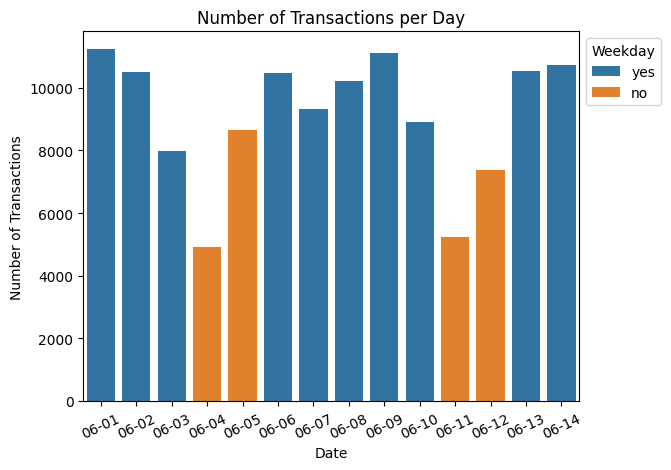

In [197]:
ax = sns.barplot(data=purchases_per_day, x="PurchaseDate", y="count", hue="Weekday")
sns.move_legend(ax, bbox_to_anchor=(1,1), loc="best")
plt.xticks(rotation=25)
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions per Day")

***
# Products Revenue + Number of Transactions

In [102]:
products_agg = (
                transactions.groupby("ProductID")
                .agg({"Price": "sum", "ProductID": "count"})
                .rename(columns={"Price": "Revenue", "ProductID": "Count"})
                .reset_index()
                )
products_agg

,ProductID,Revenue,Count
0,1001,43527.56,1244
1,1002,41778.06,1194
2,1003,42547.84,1216
3,1004,42547.84,1216
4,1005,40903.31,1169
...,...,...,...
103,1104,234555.33,1167
104,1105,238173.15,1185
105,1106,1793683.05,1195
106,1107,554595.93,1107


In [103]:
products_agg = products_agg.merge(product, on="ProductID")
products_agg

,ProductID,Revenue,Count,ProductName,ProductType,ProductCategory,Price
0,1001,43527.56,1244,Blue Shorts,Shorts,Clothing,$34.99
1,1002,41778.06,1194,Red Shorts,Shorts,Clothing,$34.99
2,1003,42547.84,1216,Green Shorts,Shorts,Clothing,$34.99
3,1004,42547.84,1216,Yellow Shorts,Shorts,Clothing,$34.99
4,1005,40903.31,1169,Pink Shorts,Shorts,Clothing,$34.99
...,...,...,...,...,...,...,...
103,1104,234555.33,1167,Wall-mounted shelf,Shelving and Storage,Furniture,$200.99
104,1105,238173.15,1185,Bunk bed,Bed,Furniture,$200.99
105,1106,1793683.05,1195,Papasan chair,Seating,Furniture,"$1,500.99"
106,1107,554595.93,1107,Slipper chair,Seating,Furniture,$500.99


In [120]:
products_agg = products_agg.replace(to_replace="Shelving and Storage", value="Storage")
products_agg

,ProductID,Revenue,Count,ProductName,ProductType,ProductCategory,Price
0,1001,43527.56,1244,Blue Shorts,Shorts,Clothing,$34.99
1,1002,41778.06,1194,Red Shorts,Shorts,Clothing,$34.99
2,1003,42547.84,1216,Green Shorts,Shorts,Clothing,$34.99
3,1004,42547.84,1216,Yellow Shorts,Shorts,Clothing,$34.99
4,1005,40903.31,1169,Pink Shorts,Shorts,Clothing,$34.99
...,...,...,...,...,...,...,...
103,1104,234555.33,1167,Wall-mounted shelf,Storage,Furniture,$200.99
104,1105,238173.15,1185,Bunk bed,Bed,Furniture,$200.99
105,1106,1793683.05,1195,Papasan chair,Seating,Furniture,"$1,500.99"
106,1107,554595.93,1107,Slipper chair,Seating,Furniture,$500.99


## Most popular product types

In [121]:
types_count = (
    products_agg[["Count", "ProductType"]]
    .groupby("ProductType")
    .sum()
    .sort_values(by="Count", ascending=False)
    .reset_index()
    )

types_count

,ProductType,Count
0,Seating,19813
1,Storage,14096
2,Ball Cap,9551
3,Shorts,9517
4,Pants,9482
5,Long Sleeve,9474
6,Sandals,9469
7,T-Shirt,9458
8,Sneakers,9438
9,Beanie,9137


Text(0.5, 1.0, 'Transactions Per Product Type')

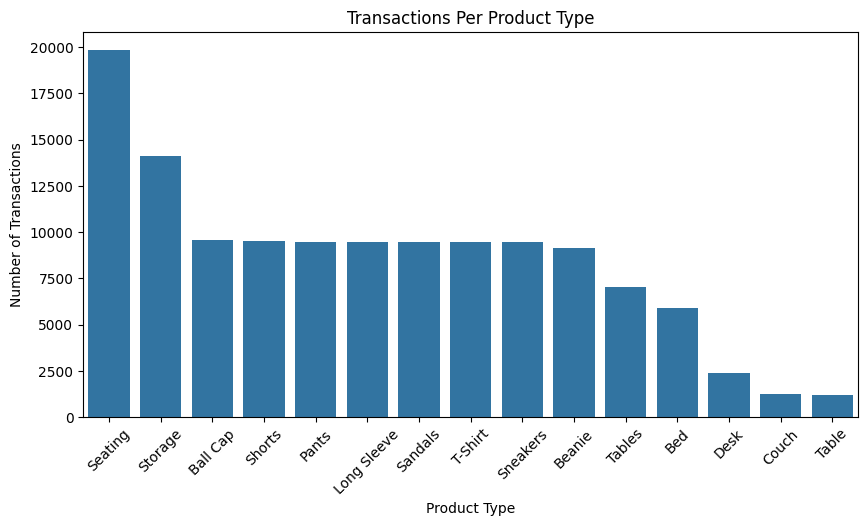

In [131]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=types_count, x="ProductType", y="Count")
plt.xticks(rotation=45)

plt.xlabel("Product Type")
plt.ylabel("Number of Transactions")
plt.title("Transactions Per Product Type")

## Revenue per Product Type

In [152]:
types_revenue = (
    products_agg[["Revenue", "ProductType"]]
    .groupby("ProductType")
    .sum()
    .sort_values(by="Revenue", ascending=False)
    .reset_index()
    )

types_revenue["Revenue"] = types_revenue["Revenue"]/1_000_000
types_revenue

,ProductType,Revenue
0,Seating,19.674515
1,Storage,12.793555
2,Tables,5.630638
3,Bed,3.933848
4,Desk,3.723963
5,Table,2.399187
6,Couch,0.635255
7,Pants,0.464523
8,Sneakers,0.367988
9,Shorts,0.333000


Text(0.5, 1.0, 'Revenue Per Product Type')

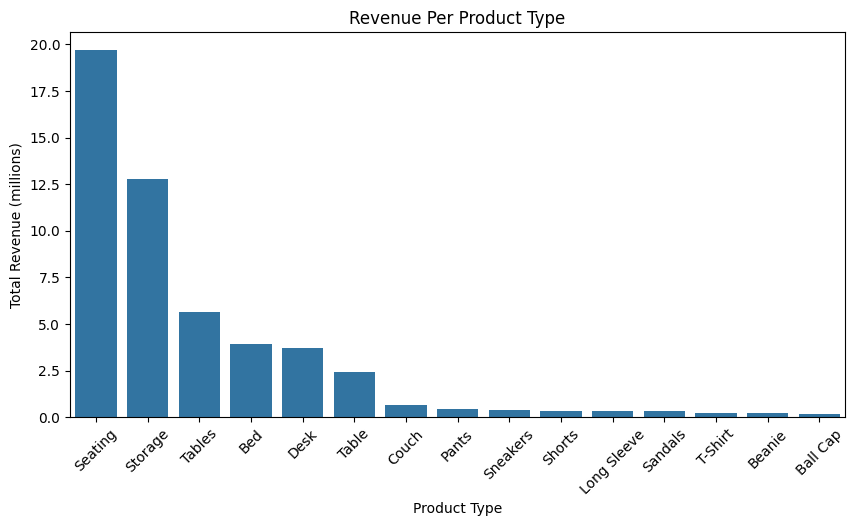

In [153]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=types_revenue, x="ProductType", y="Revenue")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)

plt.xlabel("Product Type")
plt.ylabel("Total Revenue (millions)")
plt.title("Revenue Per Product Type")

## Most popular product categories

In [110]:
categories_count = (
    products_agg[["Count", "ProductCategory"]]
    .groupby("ProductCategory")
    .sum()
    .sort_values(by="Count", ascending=False)
    .reset_index()
)
categories_count

,ProductCategory,Count
0,Furniture,51678
1,Clothing,37931
2,Footwear,18907
3,Headwear,18688


Text(0.5, 1.0, 'Transactions Per Product Category')

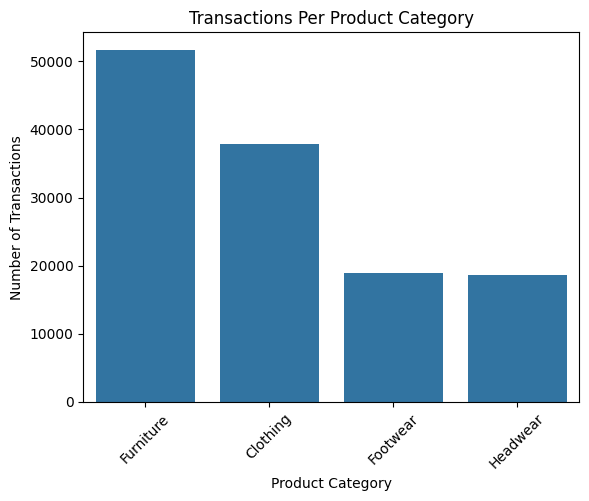

In [198]:
sns.barplot(data=categories_count, x="ProductCategory", y="Count")
plt.xticks(rotation=45)

plt.xlabel("Product Category")
plt.ylabel("Number of Transactions")
plt.title("Transactions Per Product Category")

In [154]:
categories_revenue = (
    products_agg[["Revenue", "ProductCategory"]]
    .groupby("ProductCategory")
    .sum()
    .sort_values(by="Revenue", ascending=False)
    .reset_index()
)
categories_revenue["Revenue"] = categories_revenue["Revenue"]/1_000_000
categories_revenue

,ProductCategory,Revenue
0,Furniture,48.790961
1,Clothing,1.365358
2,Footwear,0.689839
3,Headwear,0.428395


Text(0.5, 1.0, 'Revenue Per Product Category')

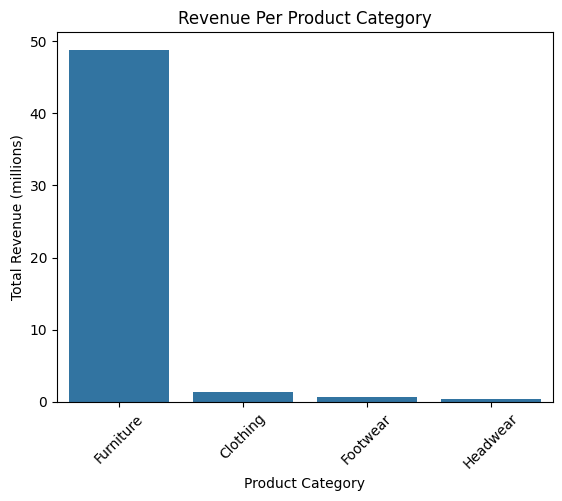

In [155]:
sns.barplot(data=categories_revenue, x="ProductCategory", y="Revenue")
plt.xticks(rotation=45)

plt.xlabel("Product Category")
plt.ylabel("Total Revenue (millions)")
plt.title("Revenue Per Product Category")

***
# Locations Revenue + Number of Transactions

In [137]:
locations_agg = (
                transactions.groupby("StoreID")
                .agg({"Price": "sum", "StoreID": "count"})
                .rename(columns={"Price": "Revenue", "StoreID": "Count"})
                .reset_index()
                )
locations_agg

,StoreID,Revenue,Count
0,101,124660.37,263
1,102,9217656.63,22637
2,103,373544.51,949
3,104,693517.57,1743
4,105,510763.76,1324
...,...,...,...
97,198,1526.98,2
98,199,10181.59,41
99,200,1142.89,11
100,201,2340.92,8


In [138]:
locations_agg = locations_agg.merge(stores, on="StoreID")
locations_agg

,StoreID,Revenue,Count,StoreCity,StoreState
0,101,124660.37,263,Abilene,TX
1,102,9217656.63,22637,Akron,OH
2,103,373544.51,949,Albany,NY
3,104,693517.57,1743,Albuquerque,NM
4,105,510763.76,1324,Alexandria,VA
...,...,...,...,...,...
97,198,1526.98,2,Escondido,CA
98,199,10181.59,41,Eugene,OR
99,200,1142.89,11,Evansville,IN
100,201,2340.92,8,Everett,WA


In [139]:
locations_agg["StoreCityState"] = locations_agg["StoreCity"] + ", " + locations_agg["StoreState"]
locations_agg

,StoreID,Revenue,Count,StoreCity,StoreState,StoreCityState
0,101,124660.37,263,Abilene,TX,"Abilene, TX"
1,102,9217656.63,22637,Akron,OH,"Akron, OH"
2,103,373544.51,949,Albany,NY,"Albany, NY"
3,104,693517.57,1743,Albuquerque,NM,"Albuquerque, NM"
4,105,510763.76,1324,Alexandria,VA,"Alexandria, VA"
...,...,...,...,...,...,...
97,198,1526.98,2,Escondido,CA,"Escondido, CA"
98,199,10181.59,41,Eugene,OR,"Eugene, OR"
99,200,1142.89,11,Evansville,IN,"Evansville, IN"
100,201,2340.92,8,Everett,WA,"Everett, WA"


In [142]:
locations_agg["StoreState"].value_counts().head(10)

StoreState
CA    20
TX    15
CO     6
OH     5
FL     5
NC     4
VA     3
IA     3
MI     3
IL     3
Name: count, dtype: int64

## Transactions per Location

In [143]:
locations_agg.columns

Index(['StoreID', 'Revenue', 'Count', 'StoreCity', 'StoreState',
       'StoreCityState'],
      dtype='object')

In [144]:
locations_count = (
    locations_agg[["Count", "StoreCityState"]]
    .groupby("StoreCityState")
    .sum()
    .sort_values(by="Count", ascending=False)
    .reset_index()
)
locations_count

,StoreCityState,Count
0,"Akron, OH",22637
1,"Arvada, CO",3480
2,"Bend, OR",3273
3,"Carrollton, TX",2858
4,"Anaheim, CA",2791
...,...,...
97,"Elizabeth, NJ",5
98,"El Monte, CA",3
99,"El Paso, TX",3
100,"Escondido, CA",2


Text(0.5, 1.0, '10 Most Popular Stores')

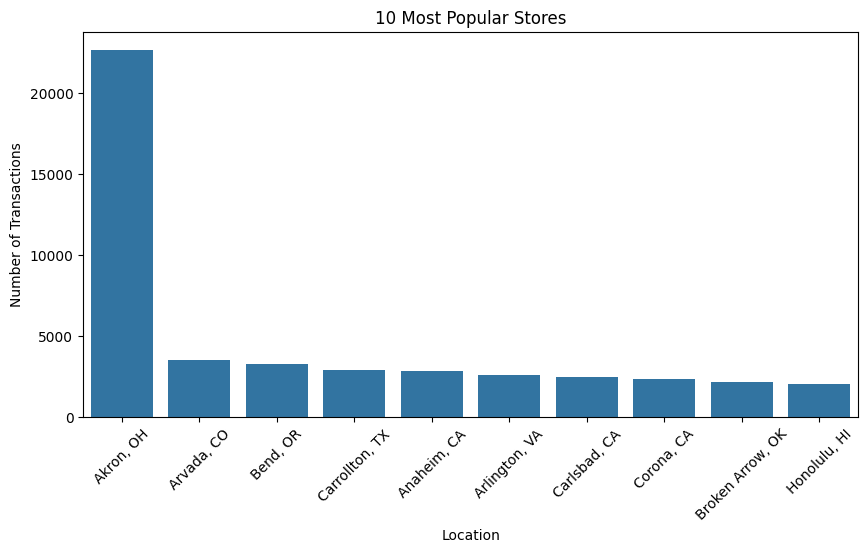

In [148]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=locations_count[0:10], x="StoreCityState", y="Count")
plt.xticks(rotation=45)

plt.xlabel("Location")
plt.ylabel("Number of Transactions")
plt.title("10 Most Popular Stores")

Text(0.5, 1.0, '10 Least Popular Stores')

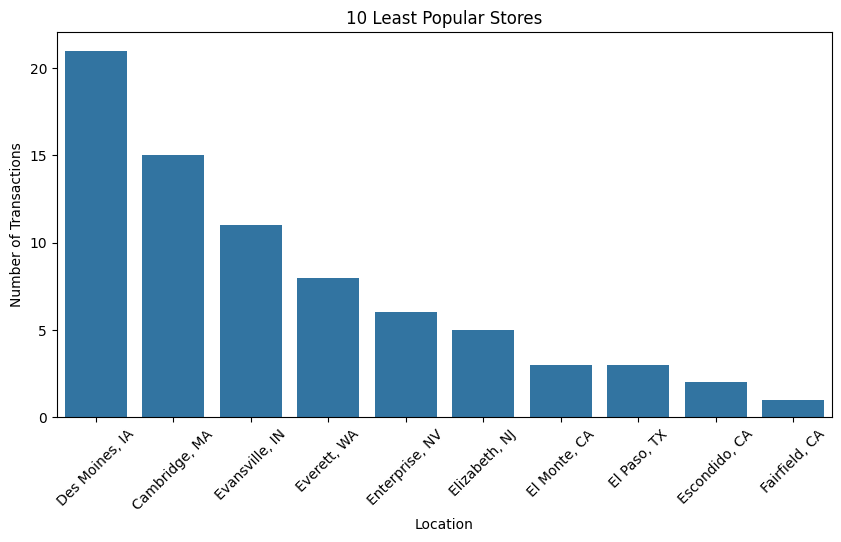

In [150]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=locations_count[-10:], x="StoreCityState", y="Count")
ax.yaxis.get_major_locator().set_params(integer=True)

plt.xticks(rotation=45)

plt.xlabel("Location")
plt.ylabel("Number of Transactions")
plt.title("10 Least Popular Stores")

### Revenue per Location

In [156]:
locations_revenue = (
    locations_agg[["Revenue", "StoreCityState"]]
    .groupby("StoreCityState")
    .sum()
    .sort_values(by="Revenue", ascending=False)
    .reset_index()
)
locations_revenue["Revenue"] = locations_revenue["Revenue"]/1_000_000
locations_revenue

,StoreCityState,Revenue
0,"Akron, OH",9.217657
1,"Arvada, CO",1.432168
2,"Bend, OR",1.373031
3,"Carrollton, TX",1.130832
4,"Anaheim, CA",1.109248
...,...,...
97,"El Monte, CA",0.001703
98,"Escondido, CA",0.001527
99,"Evansville, IN",0.001143
100,"Fairfield, CA",0.001001


Text(0.5, 1.0, '10 Highest Revenue Stores')

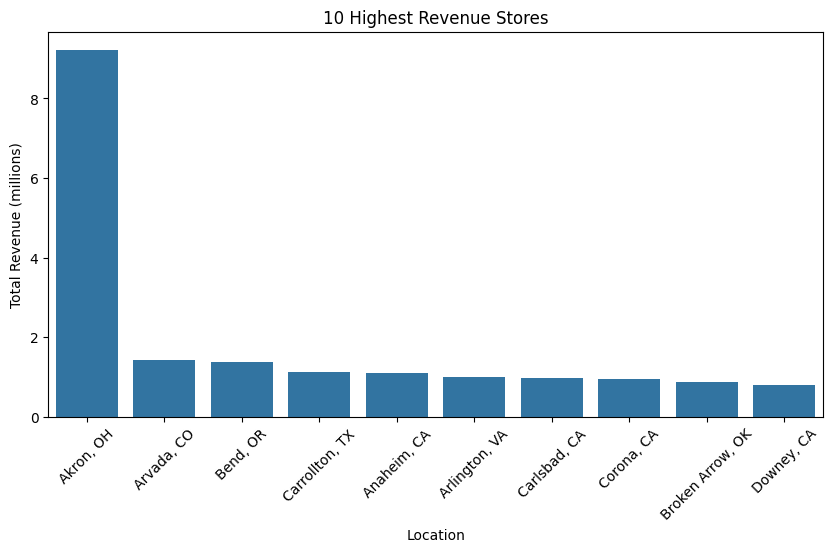

In [157]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=locations_revenue[0:10], x="StoreCityState", y="Revenue")
plt.xticks(rotation=45)

plt.xlabel("Location")
plt.ylabel("Total Revenue (millions)")
plt.title("10 Highest Revenue Stores")

Text(0.5, 1.0, '10 Lowest Revenue Stores')

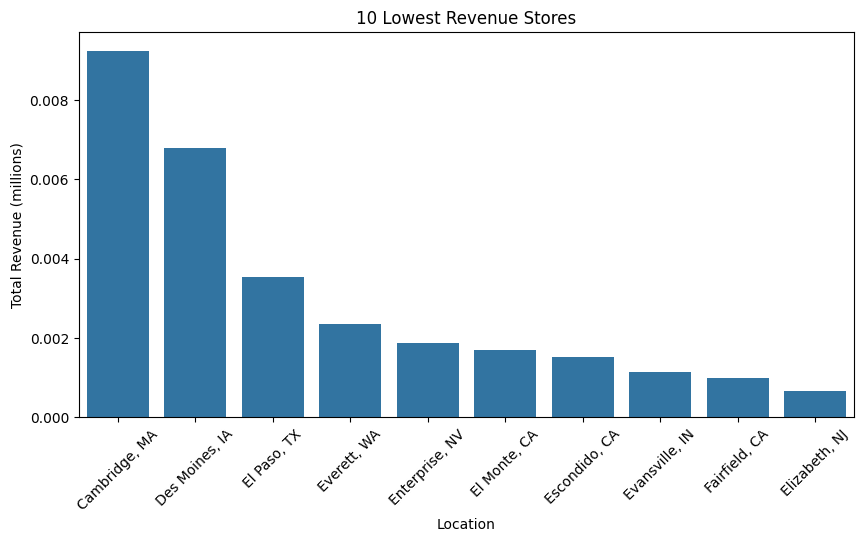

In [158]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=locations_revenue[-10:], x="StoreCityState", y="Revenue")
plt.xticks(rotation=45)

plt.xlabel("Location")
plt.ylabel("Total Revenue (millions)")
plt.title("10 Lowest Revenue Stores")